In [1]:
pip install mp-api

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.6 MB/s eta 0:00:00
   ━━━━

In [41]:
import csv
import pandas as pd
with open("/content/5_numerical_data.csv", 'r') as file:
  df = pd.read_csv("/content/5_numerical_data.csv")

                                                nsites  nelements    volume  \
nsites                                        1.000000   0.452974  0.857914   
nelements                                     0.452974   1.000000  0.298798   
volume                                        0.857914   0.298798  1.000000   
density                                      -0.388793  -0.453472 -0.325880   
density_atomic                               -0.157073  -0.240677  0.146239   
energy_per_atom                               0.206766   0.346134  0.196242   
formation_energy_per_atom                    -0.161308  -0.324364 -0.065325   
energy_above_hull                             0.020961   0.045620  0.030325   
is_stable                                    -0.168643  -0.135558 -0.097393   
equilibrium_reaction_energy_per_atom          0.114183   0.217000  0.099219   
band_gap                                      0.327307   0.389988  0.199083   
cbm                                          -0.1388

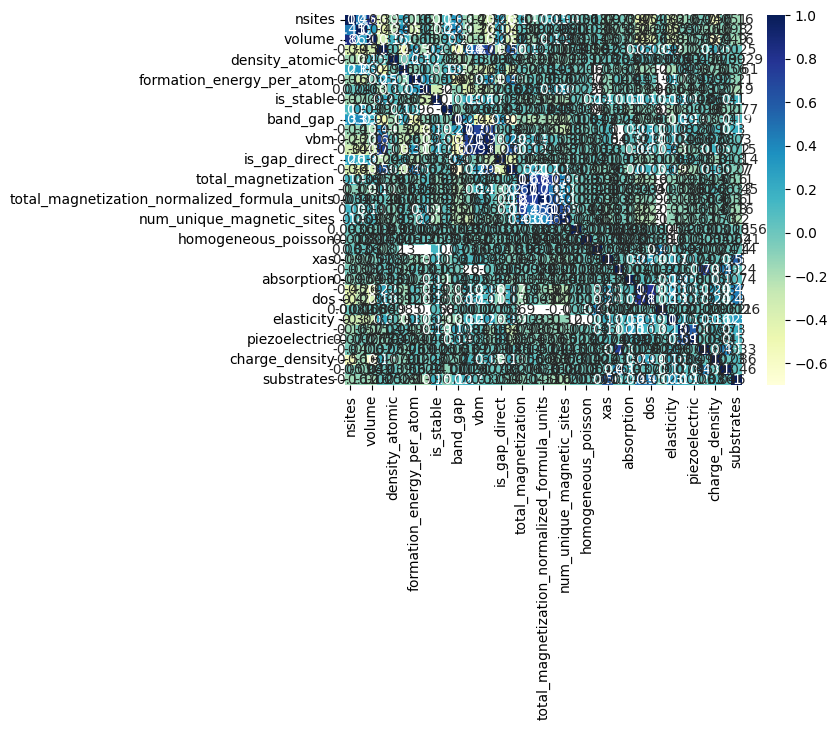

In [42]:
# Import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.feature_selection import RFE

# Print data that will be plotted
# Columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
mp.show()
#nelements nsites energy_per_atom band_gap volume
#is_metal formation_energy_per_atom vbm cbm bandstructure

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE



X = df.drop(columns =["dos"])
y = df["dos"]

# Create the list of features below
# this is what you want to base your prediction off of.
feature_names = ["nsites" , "volume", "bandstructure", "cbm", "vbm", "xas","substrates"]

# Select data corresponding to features in feature_names
X = df[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.2, random_state=1)

test_model = DecisionTreeRegressor(random_state=1)

rfe = RFE(test_model, n_features_to_select=10)
rfe.fit(train_X, train_y)

test_model.fit(train_X, train_y)

#sets the model so it uses the features (X) to find our value we want to predict (y)

# saves the prediction results to predictions. .predict executes the prediction with the inserted data.

predictions = test_model.predict(val_X)


# Defines a model and uses it to fit a line of best fit for training data x and y
test_model = DecisionTreeRegressor(random_state=1)
test_model.fit(train_X, train_y)


# Predict with all validation observations
val_predictions = test_model.predict(val_X)

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is
from sklearn.metrics import mean_absolute_error
# put in first the actual value, then the predicted values
val_mae = mean_absolute_error(val_y, val_predictions)

# Instead of accuracy_score, use metrics suitable for regression:
# mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(val_y, val_predictions)
r2 = r2_score(val_y, val_predictions)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Mean Absolute Error: ", val_mae)

Mean Squared Error:  0.07245466874277964
R-squared:  0.546962016929248
Mean Absolute Error:  0.07245466874277964


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Check for and handle categorical variables
label_encoder = LabelEncoder()

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=1000, random_state=1, oob_score=True)
# train_X, val_X, train_y, val_y
regressor.fit(train_X, train_y)
# Fit the regressor with x and y data

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=1)

In [86]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Access the OOB Score
# OOB Score is the number of correctly predicted data on OOB samples taken for validation, you want less than 1%
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
# train_X, val_X, train_y, val_y
# Making predictions on the same data or new data
predictions = regressor.predict(val_X)

# Evaluating the model
mse = mean_squared_error(val_y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(val_y, predictions)
print(f'R-squared: {r2}')

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is

val_mae = mean_absolute_error(val_y, predictions)
print("Mean Absolute Error: ", val_mae)

Out-of-Bag Score: 0.7577855968634083
Mean Squared Error: 0.038802401074890754
R-squared: 0.7573798648686433
Mean Absolute Error:  0.0740173790747903


KeyboardInterrupt: 

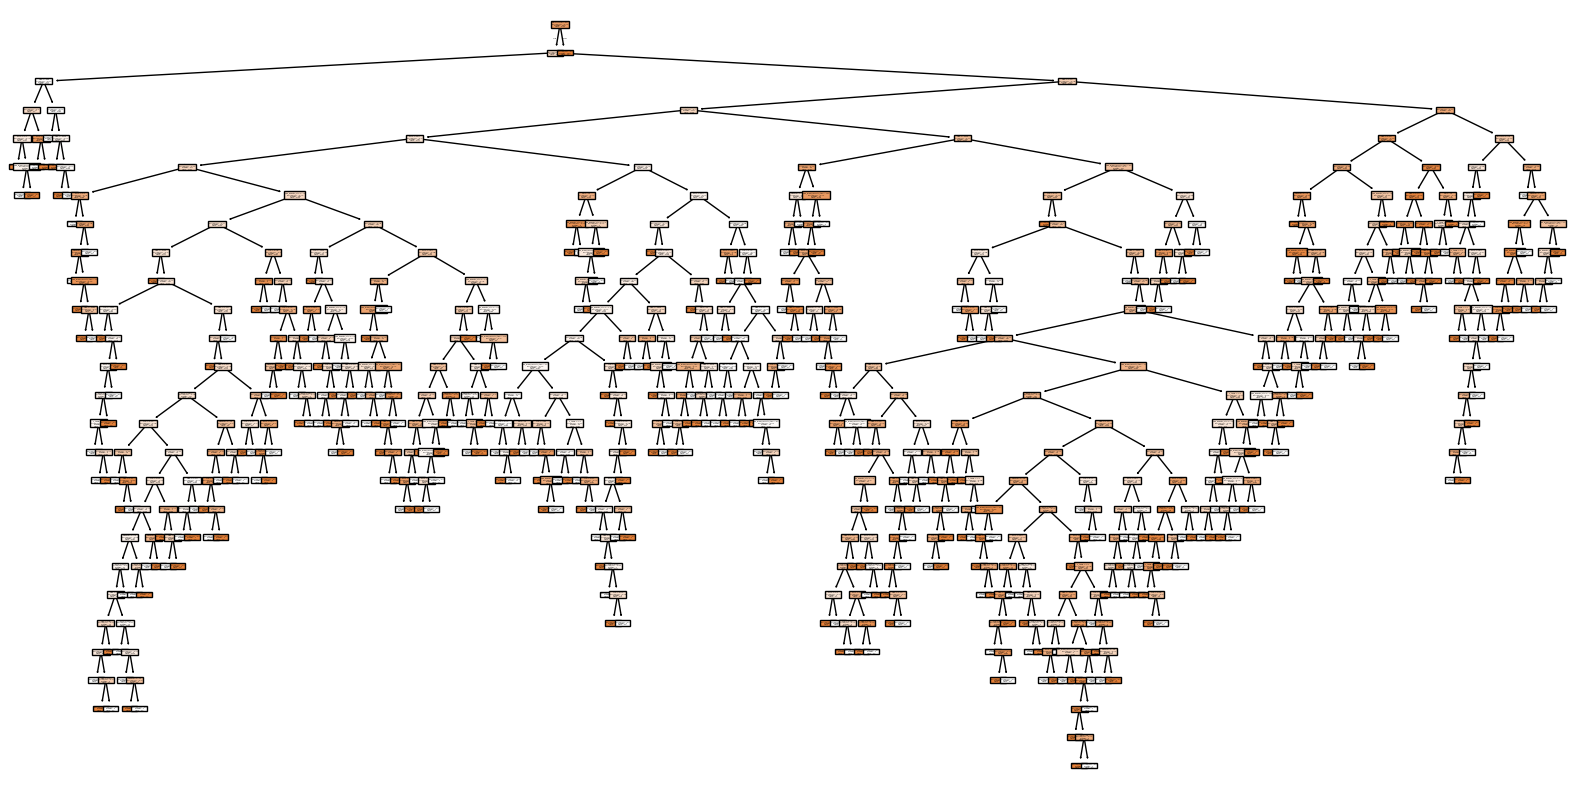

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access one of the decision trees within the forest
tree = regressor.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=train_X.columns, filled=True)
plt.savefig('tree.png')
plt.show()

